# Series Temporales

Autor: Carlos Sevilla Barceló

__Indice__

1. Un poco de teoría
2. Estacionario
    1. Test
    2. Transformaciones
3. ACF y PACF
4. Modelos clásicos
    1. AR
    2. MA
    3. ARMA
    4. ARIMA
    5. Otros
5. Modelos ML
    1. Introducción
    1. Transformacion
    2. Ejemplos





In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [1]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\puent\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Teoría 

Antes de empezar a trabajar con modelos de series de tiempo es importante entender algunos conceptos clave:

Una serie temporal es una colección de observaciones de una variable o conjunto de variables, ordenadas en el tiempo y espaciadas uniformemente. Las series temporales son utilizadas en muchos campos, incluyendo la economía, la ingeniería, las ciencias sociales y la meteorología, para analizar y predecir patrones y tendencias en los datos.

Una serie temporal tiene varias propiedades importantes que deben tenerse en cuenta al analizarla:

* __Tendencia__: una serie temporal puede tener una tendencia a largo plazo, que es una dirección general en la que los datos se mueven. Puede ser ascendente o descendente y puede ser lineal o no lineal.

* __Estacionalidad__: las series temporales pueden tener patrones estacionales o cíclicos, lo que significa que los datos varían según el momento del año o del ciclo de negocio. La estacionalidad puede ser aditiva (los datos aumentan o disminuyen en la misma cantidad en cada ciclo) o multiplicativa (los datos aumentan o disminuyen en un factor constante en cada ciclo).

* __Ciclos__: las series temporales pueden tener ciclos más largos que la estacionalidad, que pueden durar varios años. Por ejemplo, las recesiones económicas y las expansiones pueden ser ciclos que se repiten en una serie temporal.

* __Ruido__: las series temporales a menudo tienen una componente de ruido o variación aleatoria, que se debe a factores impredecibles que no se pueden modelar fácilmente. El ruido puede dificultar la identificación de patrones y tendencias en los datos.

* __Autocorrelación__: la autocorrelación se refiere a la relación entre los valores de una variable en diferentes momentos en el tiempo. Si una serie temporal tiene una alta autocorrelación, significa que los valores están fuertemente relacionados con los valores anteriores y posteriores. La autocorrelación puede ser útil para identificar patrones en la serie temporal.

* __Estacionariedad__: una serie temporal se considera estacionaria si sus propiedades estadísticas no cambian con el tiempo. Esto significa que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo. La estacionariedad es importante para aplicar ciertos modelos estadísticos y para hacer predicciones precisas en la serie temporal.

In [3]:
sm.datasets.sunspots.load_pandas().data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


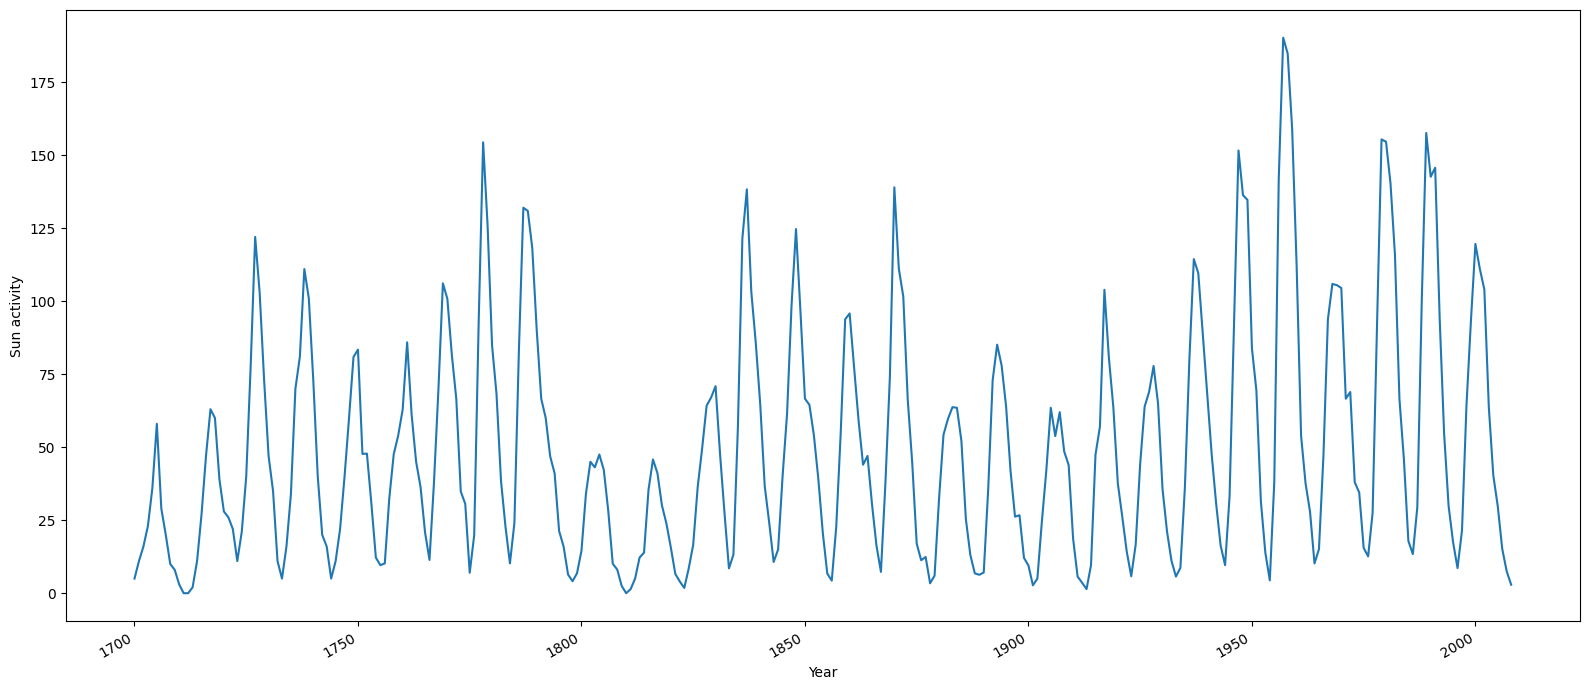

In [4]:
sunspots = sm.datasets.sunspots.load_pandas().data.dropna()

fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(sunspots['YEAR'],sunspots['SUNACTIVITY'])
ax.set_xlabel('Year')
ax.set_ylabel('Sun activity')
fig.autofmt_xdate()
plt.tight_layout()

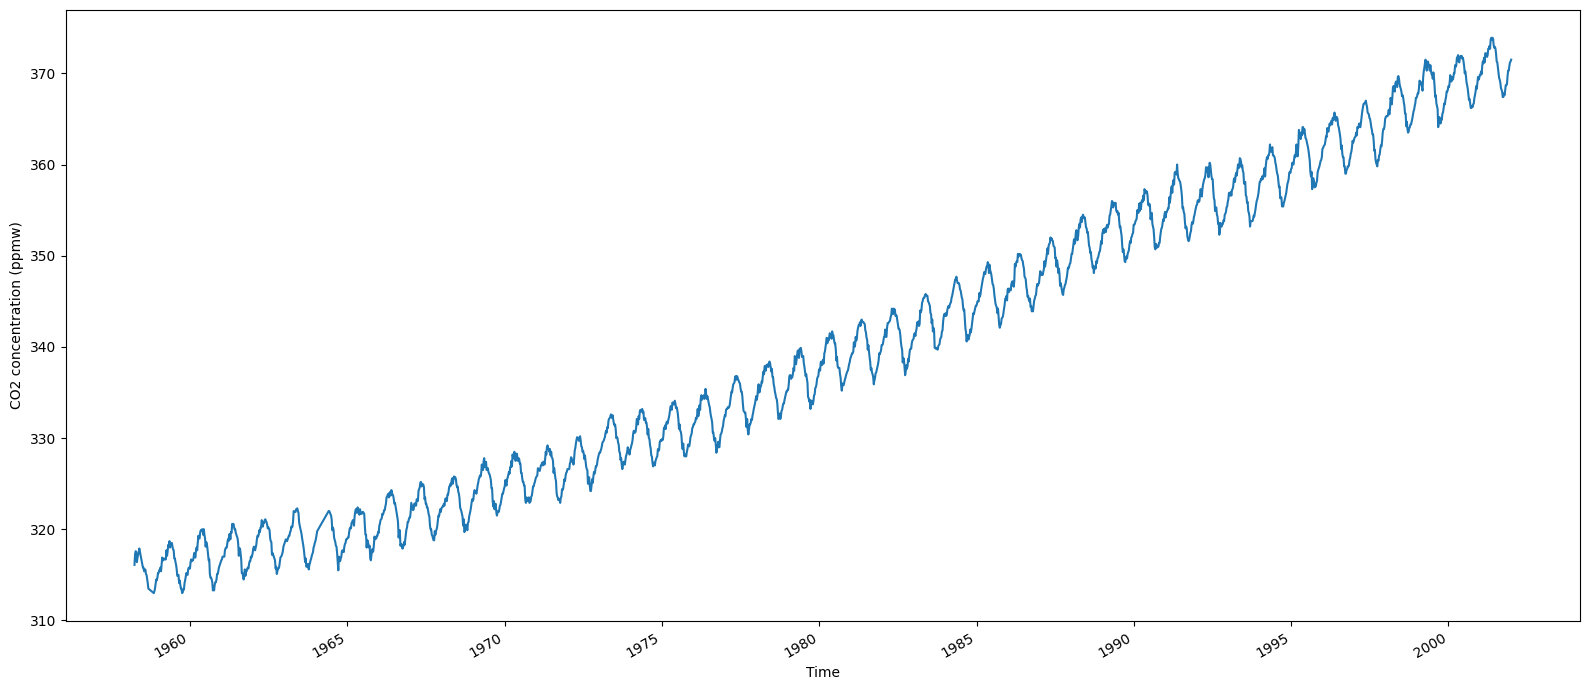

In [5]:
co2 = sm.datasets.co2.load_pandas().data.dropna()

fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(co2['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppmw)')
fig.autofmt_xdate()
plt.tight_layout()

# Estacionariedad

La estacionariedad es una propiedad importante en el análisis de series temporales. Una serie temporal se considera estacionaria si sus propiedades estadísticas no cambian con el tiempo. Esto significa que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo.

En otras palabras, si una serie temporal es estacionaria, entonces su patrón general, incluyendo su nivel medio y su variabilidad, permanece constante a lo largo del tiempo. Esto facilita el modelado y la predicción de la serie temporal, ya que se pueden utilizar técnicas estadísticas simples y los resultados obtenidos en una parte de la serie temporal pueden ser extrapolados a otras partes.

![alt text](img/stationary.webp "Title")

Es importante destacar que la estacionariedad es una propiedad matemática y no depende de la interpretación del problema o de la naturaleza de los datos. Es posible que una serie temporal tenga una tendencia o un patrón estacional y aún así ser estacionaria en términos estadísticos.

Por lo tanto, al analizar una serie temporal, es importante determinar si es estacionaria o no, ya que esto puede tener implicaciones importantes en la elección de los métodos de análisis y en la precisión de las predicciones que se pueden hacer.

Algunos modelos estadísticos exigen que la serie a modelar cumpla la condición de estacionariedad, con lo que antes de trabajar con estos modelos de series de tiempo es importante asegurarse de que la serie de tiempo sea estacionaria. En esta sección exploraremos dos formas de comprobar si una serie de tiempo es estacionaria y cómo transformar la serie de tiempo en caso de que no lo sea.

## Tests

Para comprobar si una serie de tiempo es estacionaria podemos utilizar el test de Dickey-Fuller aumentado (ADF) y Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

### ADF 
Este test comprueba si la serie de tiempo tiene raíces unitarias, lo que implica que la serie de tiempo no es estacionaria.

La intuición que subyace a una prueba de raíz unitaria es que determina hasta qué punto una serie temporal está definida por una tendencia.

Existen varias pruebas de raíz unitaria y la de Dickey-Fuller aumentada puede ser una de las más utilizadas. Utiliza un modelo autorregresivo y optimiza un criterio de información a través de múltiples valores de retardo diferentes.

La hipótesis nula de la prueba es que la serie temporal puede estar representada por una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (que rechaza la hipótesis nula) es que la serie temporal es estacionaria.

* Hipótesis nula (H0): Si no se rechaza, sugiere que la serie temporal tiene una raíz unitaria, lo que significa que __no es estacionaria__. Tiene una estructura dependiente del tiempo.
* Hipótesis alternativa (H1): Si se rechaza la hipótesis nula, sugiere que la serie temporal no tiene una raíz unitaria, lo que significa que __si es estacionaria__. No tiene estructura dependiente del tiempo.

Interpretamos este resultado utilizando el valor p de la prueba. Un valor p inferior a un umbral (como el 5% o el 1%) indica que se rechaza la hipótesis nula (estacionariedad); de lo contrario, un valor p superior al umbral indica que no se rechaza la hipótesis nula (no estacionariedad).

* Valor p > 0,05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.
* Valor p <= 0,05: Rechazamos la hipótesis nula (H0), los datos no tienen una raíz unitaria y son estacionarios.

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
# Test ADF para sunspot
result = adfuller(sunspots['SUNACTIVITY'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.837781
p-value: 0.053076
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [7]:
# Test ADF para CO2
result = adfuller(co2['co2'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.043965
p-value: 0.962020
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


### KPSS

El KPSS es otra prueba para comprobar la estacionariedad de una serie temporal. Las hipótesis nula y alternativa de la prueba KPSS son opuestas a las de la prueba ADF.

* Hipótesis nula (H0): El ciclo es estacionario en cuanto a la tendencia.
* Hipótesis alternativa (H1): La serie tiene una raíz unitaria (la serie no es estacionaria).

In [8]:
from statsmodels.tsa.stattools import kpss

In [9]:
result = kpss(sunspots['SUNACTIVITY'])

print('KPSS Test: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
 print('\t%s: %.3f' % (key, value))

KPSS Test: 0.669866
p-value: 0.016285
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [9]:
result

(-2.8377807249381966,
 0.05307642172812041,
 8,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 2430.50034229055)

In [11]:
result = kpss(co2)

print('KPSS Test: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
 print('\t%s: %.3f' % (key, value))

KPSS Test: 7.464953
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Que hacer cuando los test difieren


Siempre es mejor aplicar ambas pruebas para asegurarse de que la serie es realmente estacionaria. Los posibles resultados de la aplicación de estas pruebas de estacionariedad son los siguientes:

* Caso 1: Ambas pruebas concluyen que la serie no es estacionaria - La serie no es estacionaria
* Caso 2: Ambas pruebas concluyen que la serie es estacionaria - La serie es estacionaria
* Caso 3: El KPSS indica estacionariedad y el ADF indica no estacionariedad - La serie es estacionaria por tendencia. Es necesario eliminar la tendencia para que la serie sea estacionaria estricta. Se comprueba la estacionariedad de la serie sin tendencia.
* Caso 4: KPSS indica no estacionariedad y ADF indica estacionariedad - La serie es estacionaria por diferencia. Se utilizará la diferenciación para hacer estacionaria la serie. Se comprueba la estacionariedad de la serie diferenciada.



## Transformaciones

Si una serie de tiempo no es estacionaria, podemos aplicar transformaciones para hacerla estacionaria. Algunas de las transformaciones más comunes son:

* Diferenciación: restar la observación actual de la observación anterior para obtener la diferencia. Si es necesario, se pueden aplicar múltiples diferenciaciones hasta que la serie de tiempo sea estacionaria.
* Eliminación de la tendencia.
* Transformación logarítmica: tomar el logaritmo de la serie de tiempo para suavizar las fluctuaciones.
* Transformación de Box-Cox: una transformación que puede ser utilizada para estabilizar la varianza de la serie de tiempo.

### Diferenciación

In [10]:
co2['co2'].diff()

1958-03-29    NaN
1958-04-05    1.2
1958-04-12    0.3
1958-04-19   -0.1
1958-04-26   -1.1
             ... 
2001-12-01    0.0
2001-12-08    0.5
2001-12-15    0.4
2001-12-22    0.1
2001-12-29    0.2
Name: co2, Length: 2225, dtype: float64

Que es el equivalente a este código

In [13]:
co2['co2'] - co2['co2'].shift(1)

1958-03-29    NaN
1958-04-05    1.2
1958-04-12    0.3
1958-04-19   -0.1
1958-04-26   -1.1
             ... 
2001-12-01    0.0
2001-12-08    0.5
2001-12-15    0.4
2001-12-22    0.1
2001-12-29    0.2
Name: co2, Length: 2225, dtype: float64

### Eliminar la tendencia

Mediante una descomposición STL, puedes obtener el compontente de tendencia de una serie temporal y restarselo. 

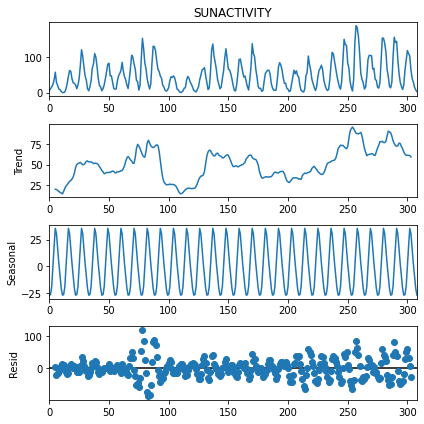

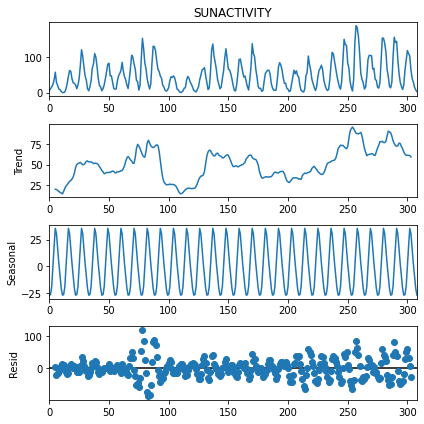

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(sunspots['SUNACTIVITY'],period=11, model = 'additive')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot()

<AxesSubplot: >

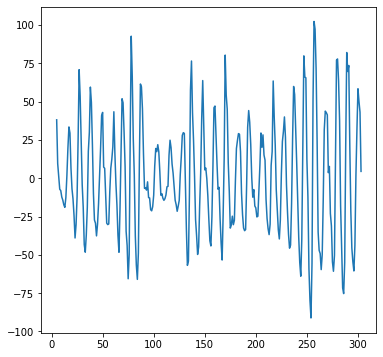

In [15]:
(sunspots['SUNACTIVITY'] - result_add.trend).plot()

### Transformación Logaritmica

<AxesSubplot: >

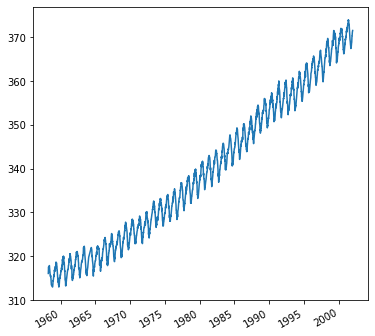

In [16]:
co2['co2'].plot()

<AxesSubplot: >

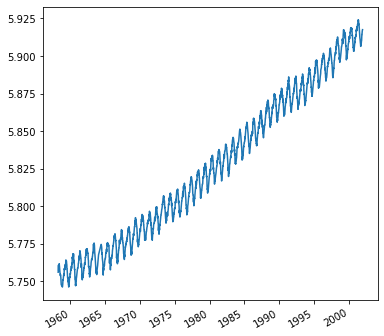

In [17]:
np.log(co2['co2']).plot()

# ACF y PACF

Los diagramas ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) son herramientas comúnmente utilizadas en el análisis de series de tiempo para determinar la presencia de autocorrelación en los datos.

El diagrama ACF muestra la correlación entre una serie de tiempo y sus valores anteriores, es decir, la correlación entre cada valor y los valores precedentes a él. El eje horizontal del diagrama ACF representa el número de retrasos (lags) y el eje vertical representa el valor de correlación. Un pico en el diagrama ACF en el lag k indica una fuerte correlación entre los valores de la serie de tiempo separados por k períodos de tiempo.

Por otro lado, el diagrama PACF muestra la correlación entre una serie de tiempo y sus valores anteriores, teniendo en cuenta solo la influencia directa de los valores en los lags intermedios. En otras palabras, el diagrama PACF muestra la correlación entre dos valores de la serie de tiempo que están separados por k períodos, teniendo en cuenta solo los valores en los lags intermedios. Un pico en el diagrama PACF en el lag k indica que hay una correlación significativa entre los valores de la serie de tiempo separados por k períodos, teniendo en cuenta solo los valores en los lags intermedios.

El uso principal de estos diagramas es determinar la estructura de un modelo de serie de tiempo adecuado para los datos. Al interpretar los picos en los diagramas ACF y PACF, se pueden identificar patrones en los datos que sugieren la presencia de estacionalidad, tendencias, ciclos y otros componentes importantes de la serie de tiempo. Esta información puede ser útil para seleccionar un modelo de serie de tiempo que pueda predecir con precisión los valores futuros de la serie de tiempo.

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

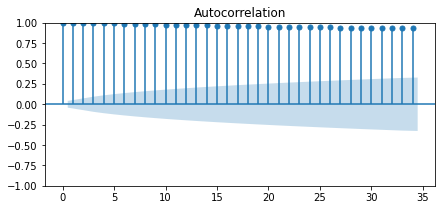

In [19]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(co2['co2'],ax=ax)
plt.show()

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


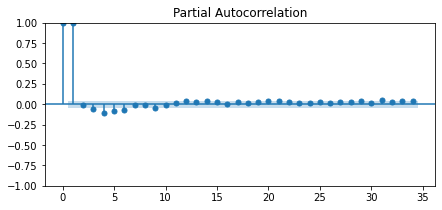

In [20]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(co2['co2'],ax=ax)
plt.show()

## Interpretación

Para obtener el orden de los modelo de tipo ARIMA, seguiremos esta tabla. 

| | AR(p)| MA(q) | ARMA(p,q) |
|---|---|---|---|
| ACF | varios puntos con coef>0 decayendo | 0 excepto los `q` primeros | varios puntos con coef>0 decayendo |
| PCAF | 0 excepto los `p` primeros | varios puntos con coef>0 | varios puntos con coef>0 |

Observando los correlogramas, buscaremos `el corte` de la serie. Esto lo haremos buscando el primer retardo que no se considere significativo (que esté dentro de la región de  no significancia). Lo que se encuentre por encima de estas bandas, se puede considerar significante, y por debajo, a efectos prácticos equivale a 0. 

El valor de `p` o `q` será el valor del último retraso significativo (postivo o negativo)


### Ejemplo: manchas solares. 

In [21]:
# Diferenciamos la serie para que sea estacionaria
sunspots_diff = sunspots['SUNACTIVITY'].diff().dropna()

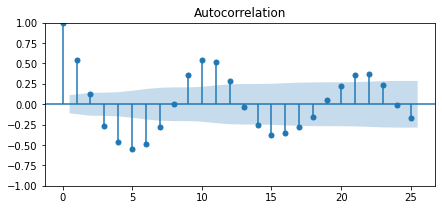

In [22]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(sunspots_diff,ax=ax)
plt.show()

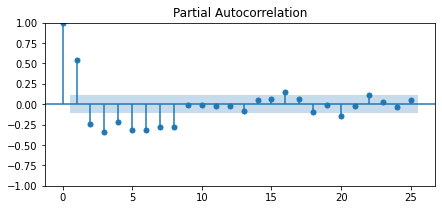

In [23]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(sunspots_diff,ax=ax)
plt.show()

Como en en el ACF vemos el corte en el retraso 2, su valor de `q` será = 1, mientras que en el PACF vemos que el corte está en el retraso 9, con lo que su valor de `p` será = 8.

### Ejemplo: co2

In [24]:
co2_diff = co2['co2'].diff().dropna()

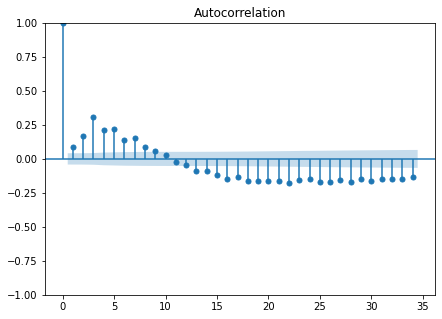

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))
plot_acf(co2_diff,ax=ax)
plt.show()

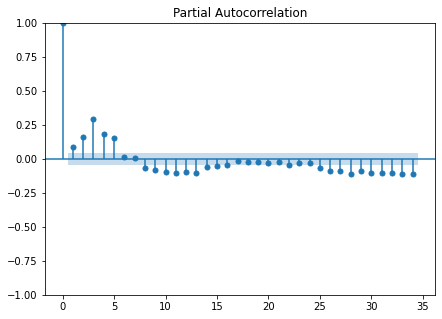

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))
plot_pacf(co2_diff,ax=ax)
plt.show()

Como en en el ACF vemos el corte en el retraso 9, su valor de `q` será = 8, mientras que en el PACF vemos que el corte está en el retraso 6, con lo que su valor de `p` será = 5.

Para más ejemplos de interpretación, consulta [este artículo](https://enrdados.netlify.app/post/series-temporales-con-arima-ii/).

# Modelos estadísticos para series temporales

En esta sección veremos los modelos más típicos para series temporales.

## AR - Auto Regresivos

El modelo autorregresivo (AR) es un modelo estadístico utilizado para analizar y predecir valores en una serie de tiempo. En este modelo, la variable dependiente (o la serie de tiempo) se regresa en sí misma con retrasos (también llamados lags) como variables independientes.

Un modelo autorregresivo de orden p (AR(p)) se define como:

$$    y_t = c + φ_1 y_{t-1} + φ_2 y_{t-2} + ... + φ_p y_{t-p} + ε_t $$

Donde:

- y_t es la variable dependiente en el tiempo t.
- c es una constante.
- φ_1 a φ_p son los coeficientes autorregresivos que miden la relación entre la variable dependiente en el tiempo actual y sus valores pasados.
- ε_t es el término de error aleatorio en el tiempo t.

El término "orden p" hace referencia a la cantidad de lags utilizados en el modelo. El modelo AR(p) es utilizado para series de tiempo que exhiben cierto grado de autocorrelación, es decir, cuando el valor de la serie en un momento dado está correlacionado con sus valores en momentos anteriores.

Para ajustar el modelo AR(p), se utilizan técnicas de estimación de parámetros para determinar los valores de los coeficientes φ_1 a φ_p y la constante c. Luego, el modelo se puede utilizar para hacer pronósticos sobre los valores futuros de la serie de tiempo.

Un modelo AR(p) y un modelo ARIMA(p,0,0) son iguales.

In [27]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(sunspots_diff, lags=8)
resultados = model.fit()

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
print(resultados.summary())

                            AutoReg Model Results                             
Dep. Variable:            SUNACTIVITY   No. Observations:                  308
Model:                     AutoReg(8)   Log Likelihood               -1239.668
Method:               Conditional MLE   S.D. of innovations             15.079
Date:                Fri, 03 Mar 2023   AIC                           2499.335
Time:                        12:49:30   BIC                           2536.373
Sample:                             8   HQIC                          2514.158
                                  308                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2333      0.871      0.268      0.789      -1.474       1.940
SUNACTIVITY.L1     0.1982      0.056      3.566      0.000       0.089       0.307
SUNACTIVITY.L2    -0.2075      0.056

In [29]:
predicciones = resultados.predict(start=len(sunspots_diff), end=len(sunspots_diff)+10)

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


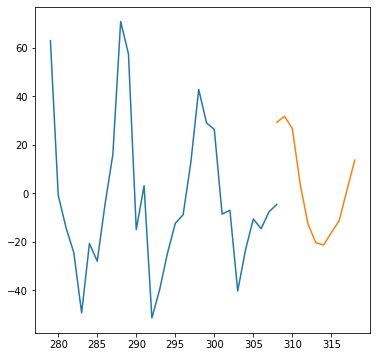

In [30]:
plt.plot(sunspots_diff[-30:])
plt.plot(predicciones)
plt.show()

## MA - Medias móviles

El modelo de media móvil (MA) es otro modelo estadístico utilizado para analizar y predecir valores en una serie de tiempo. A diferencia del modelo AR, el modelo MA no utiliza valores pasados de la variable dependiente como variables independientes. En su lugar, utiliza un término de error aleatorio en el modelo que se deriva de una media móvil de los errores de pronóstico previos.

Un modelo de media móvil de orden q (MA(q)) se define como:

$$    y_t = c + ε_t + θ_1 ε_{t-1} + θ_2 ε_{t-2} + ... + θ_q ε_{t-q} $$

Donde:

- y_t es la variable dependiente en el tiempo t.
- c es una constante.
- ε_t es el término de error aleatorio en el tiempo t.
- θ_1 a θ_q son los coeficientes de media móvil que miden la relación entre el término de error aleatorio actual y los errores de pronóstico anteriores.

El término "orden q" hace referencia a la cantidad de errores de pronóstico previos utilizados en el modelo. El modelo MA(q) es utilizado para series de tiempo que exhiben cierto grado de heterocedasticidad (es decir, variación no constante en la varianza), lo que hace que los modelos de regresión lineal ordinarios no sean apropiados.

Para ajustar el modelo MA(q), se utilizan técnicas de estimación de parámetros para determinar los valores de los coeficientes θ_1 a θ_q y la constante c. Luego, el modelo se puede utilizar para hacer pronósticos sobre los valores futuros de la serie de tiempo.

Un modelo MA(q) y un modelo ARIMA(0,0,q) son iguales.

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sunspots_diff, order=(0,0,1))
resultados = model.fit()

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  308
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1368.639
Date:                Fri, 03 Mar 2023   AIC                           2743.278
Time:                        12:49:30   BIC                           2754.469
Sample:                             0   HQIC                          2747.753
                                - 308                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      1.997     -0.003      0.998      -3.920       3.908
ma.L1          0.4758      0.046     10.386      0.000       0.386       0.566
sigma2       423.4921     26.899     15.744      0.0

In [33]:
predicciones = resultados.predict(start=len(sunspots_diff), end=len(sunspots_diff)+10)

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


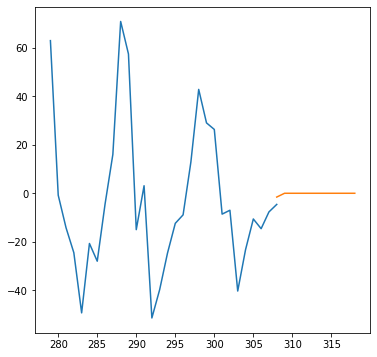

In [34]:
plt.plot(sunspots_diff[-30:])
plt.plot(predicciones)
plt.show()

## ARMA - Auto Regresivo con Media movil

El modelo autoregresivo de media móvil (ARMA) es un modelo estadístico que combina las características del modelo autoregresivo (AR) y el modelo de media móvil (MA) para analizar y predecir valores en una serie de tiempo. El modelo ARMA se utiliza para series de tiempo que exhiben tanto la autocorrelación (dependencia entre los valores pasados de la serie de tiempo) como la heterocedasticidad (variación no constante en la varianza).

El modelo ARMA(p, q) se define como:

$$    y_t = c + φ_1 y_{t-1} + φ_2 y_{t-2} + ... + φ_p y_{t-p} + ε_t + θ_1 ε_{t-1} + θ_2 ε_{t-2} + ... + θ_q ε_{t-q} $$

Donde:

- y_t es la variable dependiente en el tiempo t.
- c es una constante.
- φ_1 a φ_p son los coeficientes autoregresivos que miden la relación entre la variable dependiente actual y los valores pasados de la serie de tiempo.
- ε_t es el término de error aleatorio en el tiempo t.
- θ_1 a θ_q son los coeficientes de media móvil que miden la relación entre el término de error aleatorio actual y los errores de pronóstico anteriores.

El término "orden p" se refiere a la cantidad de valores pasados de la serie de tiempo que se incluyen en el modelo AR, mientras que el término "orden q" se refiere a la cantidad de errores de pronóstico anteriores que se incluyen en el modelo MA.

Para ajustar un modelo ARMA, se utilizan técnicas de estimación de parámetros para determinar los valores de los coeficientes φ_1 a φ_p, θ_1 a θ_q y la constante c. Luego, el modelo se puede utilizar para hacer predicciones sobre los valores futuros de la serie de tiempo.

Un modelo ARMA(p,q) y un modelo ARIMA(p,0,q) son iguales

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sunspots_diff, order=(8,0,1))
resultados = model.fit()

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  308
Model:                 ARIMA(8, 0, 1)   Log Likelihood               -1273.233
Date:                Fri, 03 Mar 2023   AIC                           2568.465
Time:                        12:49:31   BIC                           2609.496
Sample:                             0   HQIC                          2584.871
                                - 308                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0931      0.396      0.235      0.814      -0.683       0.869
ar.L1          0.2785      0.188      1.481      0.139      -0.090       0.647
ar.L2         -0.2293      0.070     -3.273      0.0

In [37]:
predicciones = resultados.predict(start=len(sunspots_diff), end=len(sunspots_diff)+10)

/home/carlos/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


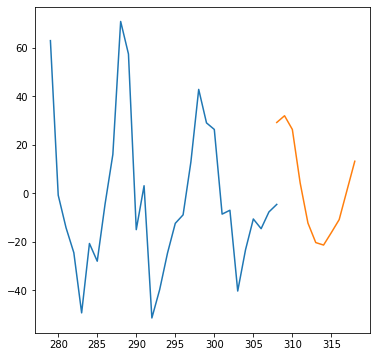

In [38]:
plt.plot(sunspots_diff[-30:])
plt.plot(predicciones)
plt.show()

## ARIMA - Auto Regresivo Integrado con Media Movil


El modelo integrado de media móvil autoregresiva (ARIMA) es un modelo estadístico utilizado para analizar y predecir valores en series de tiempo. El modelo ARIMA se basa en el modelo autoregresivo de media móvil (ARMA), pero se extiende para incluir la diferenciación para estabilizar la varianza y obtener una serie de tiempo estacionaria.

La diferenciación implica calcular la diferencia entre los valores observados de la serie de tiempo en diferentes períodos de tiempo. Por ejemplo, si la serie de tiempo es mensual, la primera diferencia sería la diferencia entre los valores de la serie de tiempo en el mes actual y el mes anterior. La segunda diferencia sería la diferencia entre los valores de la primera diferencia en el mes actual y el mes anterior, y así sucesivamente. La diferenciación se utiliza para eliminar la tendencia y la heterocedasticidad de la serie de tiempo y convertirla en una serie estacionaria.

El modelo ARIMA(p, d, q) se define como:

$$ y_t = c + φ_1 (y_{t-1} - y_{t-2}) + ... + φ_p (y_{t-p} - y_{t-p-1}) + ε_t + θ_1 ε_{t-1} + ... + θ_q ε_{t-q} $$

Donde:

- y_t es la variable dependiente en el tiempo t.
- c es una constante.
- d es el número de veces que se diferencia la serie de tiempo para obtener una serie estacionaria.
- φ_1 a φ_p son los coeficientes autoregresivos que miden la relación entre la variable dependiente actual y los valores pasados de la serie de tiempo.
- ε_t es el término de error aleatorio en el tiempo t.
- θ_1 a θ_q son los coeficientes de media móvil que miden la relación entre el término de error aleatorio actual y los errores de pronóstico anteriores.

El término "orden p" se refiere a la cantidad de valores pasados de la serie de tiempo que se incluyen en el modelo AR, mientras que el término "orden q" se refiere a la cantidad de errores de pronóstico anteriores que se incluyen en el modelo MA.

El modelo ARIMA se ajusta utilizando técnicas de estimación de parámetros para determinar los valores de los coeficientes φ_1 a φ_p, θ_1 a θ_q, la constante c y el parámetro d de diferenciación. Luego, el modelo se puede utilizar para hacer predicciones sobre los valores futuros de la serie de tiempo.

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sunspots['SUNACTIVITY'], order=(8,1,1))
resultados = model.fit()

In [40]:
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -1273.274
Date:                Fri, 03 Mar 2023   AIC                           2566.547
Time:                        12:49:32   BIC                           2603.848
Sample:                             0   HQIC                          2581.462
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2773      0.188      1.477      0.140      -0.091       0.645
ar.L2         -0.2289      0.070     -3.264      0.001      -0.366      -0.091
ar.L3         -0.3490      0.067     -5.175      0.0

In [41]:
predicciones = resultados.predict(start=len(sunspots_diff), end=len(sunspots_diff)+10)

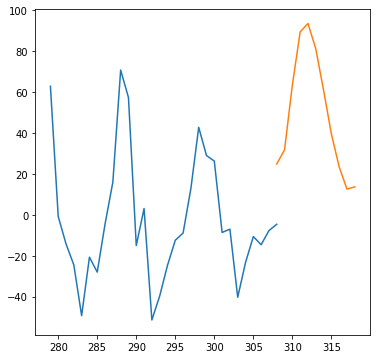

In [42]:
plt.plot(sunspots_diff[-30:])
plt.plot(predicciones)
plt.show()

## Auto ARIMA

En la actualidad, la elección de los parámetros de un modelo Arima se realiza utilizando `auto_arima`

In [43]:
# ! pip install pmdarima

In [44]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(sunspots['SUNACTIVITY'])

In [45]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  309
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1280.477
Date:                Fri, 03 Mar 2023   AIC                           2572.954
Time:                        12:49:37   BIC                           2595.335
Sample:                             0   HQIC                          2581.903
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6145      0.026     62.096      0.000       1.564       1.665
ar.L2         -0.9354      0.022    -41.820      0.000      -0.979      -0.892
ma.L1         -1.4392      0.059    -24.590      0.000      -1.554      -1.324
ma.L2          0.4545      0.095      4.783      0.000       0.268       0.641
ma.L3          0.1285      0.060      2.143      0.032       0.011       0.246
sigma2       236.7573     16.333     14.495      0.000     204.744     268.770
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.54
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
preds = arima_model.predict(10)

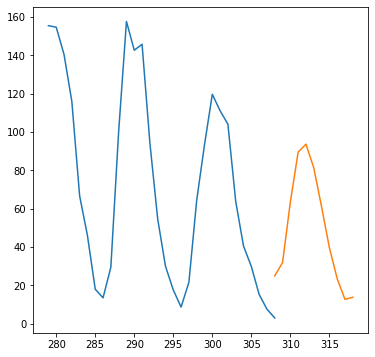

In [47]:
plt.plot(sunspots['SUNACTIVITY'][-30:])
plt.plot(predicciones)
plt.show()

Puedes ver más sobre `auto_arima` [aquí](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd).

## Otros modelos. 

Existen más modelos derivados de estos, ya sean por modificaciones o por la introducción de mejoras, como el ARIMAX, el SARIMA, el SARIMAX, etc. 

# Modelos Machine Learning

Los modelos anteriores están diseñados para series temporales, pero eso no quiere decir que no podamos usar otros modelos de Machine Learning para este propósito. Otros modelos como por ejemplo el RandomForest no están diseñados para ser usados con series temporales de forma nativa, pero aplicando algunas transformaciones en los datos, podemos usar estos modelos. 

Una serie temporal se puede entender como un vector (un array, una lista) de una dimensión, que "esconde" otra dimensión que es el eje temporal. Con modelos de Machine Learning que requieren datos tabulares, de primeras podríamos pensar que no se puede usar porque no tenemos datos tabulares (entendiendo datos tabulares como una matriz) porque tenemos un vector, pero podemos adaptar este vector para crear una matriz de la siguiente manera.

![Transformación de vector a matriz](https://www.cienciadedatos.net/images/transform_timeseries.gif)

_Imagen extraida de [cienciadedatos.net](https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html)_

Una vez con tenemos los datos en forma de matriz, podemos usar estos modelos. 

Para hacer esta transformación existen paquetes como [skforecast](https://github.com/JoaquinAmatRodrigo/skforecast) o [mlforecast](https://github.com/Nixtla/mlforecast) que tienen funciones para obtener esta matriz de forma correcta y sencilla. 

## Ejemplo skforecast 

In [48]:
# !pip install skforecast

In [49]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.ensemble import RandomForestRegressor

In [50]:
# Para el ejemplo, vamos a cambiar el índice de co2 

co2.index = pd.date_range(start='2000-01-01',periods=co2.shape[0],freq='D')

In [51]:
# Separación datos train-test

steps = 15
train = co2[:-steps]
test  = co2[-steps:]

print(f"Fechas train : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Fechas test  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

Fechas train : 2000-01-01 00:00:00 --- 2006-01-18 00:00:00  (n=2210)
Fechas test  : 2006-01-19 00:00:00 --- 2006-02-02 00:00:00  (n=15)


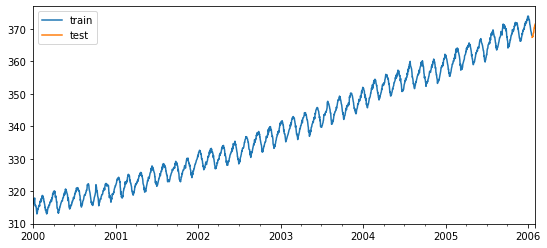

In [52]:
fig, ax = plt.subplots(figsize=(9, 4))
train['co2'].plot(ax=ax, label='train')
test['co2'].plot(ax=ax, label='test')
ax.legend()

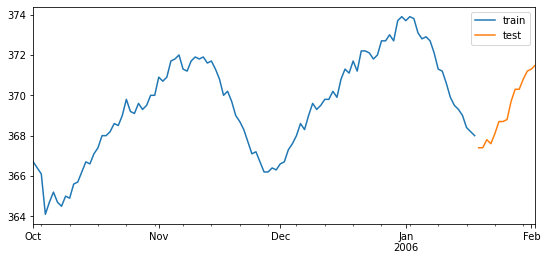

In [53]:
fig, ax = plt.subplots(figsize=(9, 4))
train['2005-10-01':]['co2'].plot(ax=ax, label='train')
test['co2'].plot(ax=ax, label='test')
ax.legend()

In [54]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=2023),
                lags = 15
             )

forecaster.fit(y=train['co2'])
forecaster


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=2023) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2000-01-01 00:00:00'), Timestamp('2006-01-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-03-03 12:49:39 
Last fit date: 2023-03-03 12:49:40 
Skforecast version: 0.6.0 
Python version: 3.8.10 

In [55]:
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2006-01-19    367.791
2006-01-20    367.769
2006-01-21    367.775
2006-01-22    367.769
2006-01-23    367.785
Freq: D, Name: pred, dtype: float64

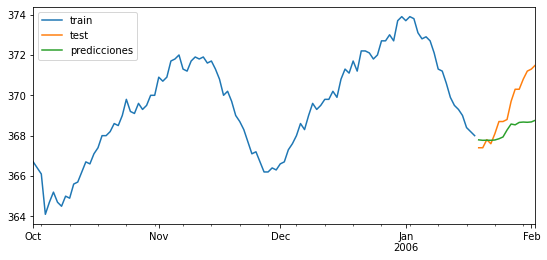

In [56]:
fig, ax = plt.subplots(figsize=(9, 4))
train['2005-10-01':]['co2'].plot(ax=ax, label='train')
test['co2'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend()

# Bibliografía

https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0

https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1

https://machinelearningmastery.com/time-series-data-stationary-python/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://machinelearningmastery.com/time-series-trends-in-python/

https://albertoalmuinha.com/es/posts/2021-02-25-stationarity/stationarity_es/

https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html

https://enrdados.netlify.app/post/series-temporales-con-arima-ii/

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd